# Import Package

In [13]:
# basic python package
import importlib
import numpy as np

# python ploting packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


# self-define classes
from script import CR_ML_Class as CR

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))

# limit GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)

Tensorflow Version is 2.4.1
Keras Version is 2.4.0
1 Physical GPUs, 1 Logical GPU


# Load Trained Modle
- trained by the data without noise within 6 $\sigma$ bands (Mock Data)

In [17]:
model_wo_noise = load_model("../Model/CR_ML_without_noise_6sigma.h5")
model_wo_noise.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_input (Conv1D)        (None, 8, 512)            43520     
_________________________________________________________________
Conv1D_1 (Conv1D)            (None, 8, 512)            262656    
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 8, 256)            131328    
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 8, 256)            65792     
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 8, 128)            32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

In [19]:
importlib.reload(CR)

mock_data_path = "../Data/Numpy_mock_data/"

para_0_0 = np.load(mock_data_path + "parameter_0.npy")
para_0_1 = np.load(mock_data_path + "new_parameter_0.npy")
origin_data_0 = np.load(mock_data_path + "data_0.npy")
mock_0 = CR.Mock_Data_PreProcessing(para_0_0, para_0_1, origin_data_0)
print("There are {} data ".format(len(mock_0.new_parameter)))
chi_0 = np.load(mock_data_path + "new_chi_0.npy")

para_1_0 = np.load(mock_data_path + "parameter_1.npy")
para_1_1 = np.load(mock_data_path + "new_parameter_1.npy")
origin_data_1 = np.load(mock_data_path + "data_1.npy")
mock_1 = CR.Mock_Data_PreProcessing(para_1_0, para_1_1, origin_data_1)
chi_1 = np.load(mock_data_path + "new_chi_1.npy")

parameter_2_0 =  np.load(mock_data_path + "parameter_2.npy")
parameter_2_1 = np.load(mock_data_path + "new_parameter_2.npy")
origin_data_2 = np.load(mock_data_path + "data_2.npy")
mock_2 = CR.Mock_Data_PreProcessing(parameter_2_0, parameter_2_1, origin_data_2)
chi_2 = np.load(mock_data_path + "new_chi_2.npy")


parameter_3_0 =  np.load(mock_data_path + "parameter_3.npy")
parameter_3_1 = np.load(mock_data_path + "new_parameter_3.npy")
origin_data_3 = np.load(mock_data_path + "data_3.npy")
mock_3 = CR.Mock_Data_PreProcessing(parameter_3_0, parameter_3_1, origin_data_3)
chi_3 = np.load(mock_data_path + "new_chi_3.npy")

parameter_4_0 =  np.load(mock_data_path + "parameter_4.npy")
parameter_4_1 = np.load(mock_data_path + "new_parameter_4.npy")
origin_data_4 = np.load(mock_data_path + "data_4.npy")
mock_4 = CR.Mock_Data_PreProcessing(parameter_4_0, parameter_4_1, origin_data_4)
chi_4 = np.load(mock_data_path + "new_chi_4.npy")

parameter = np.concatenate((mock_0.new_parameter,mock_1.new_parameter))
data = np.concatenate((mock_0.data,mock_1.data))
chi = np.concatenate((chi_0,chi_1))

parameter = np.concatenate((parameter,mock_2.new_parameter))
data = np.concatenate((data,mock_2.data))
chi = np.concatenate((chi,chi_2))

parameter = np.concatenate((parameter,mock_3.new_parameter))
data = np.concatenate((data,mock_3.data))
chi = np.concatenate((chi,chi_3))

# parameter = np.concatenate((parameter,mock_4.new_parameter))
# data = np.concatenate((data,mock_4.data))
# chi = np.concatenate((chi,chi_4))


# parameter = mock_4.new_parameter[:15000]
# data = mock_4.data[:15000]
# chi =chi_4[:15000]

chi_sort = np.argsort(chi)

print("minium chi:", min(chi))
print("There are {} data ".format(parameter.shape[0]))

There are 223365 data 
minium chi: 347.33360999999996
There are 344445 data 


# Split Data into Different CL regions

In [5]:
importlib.reload(CR)
chi_para, chi_data, chi_sele = parameter,data,chi #mock_0.new_parameter[:], mock_0.data[:], chi_0[:]

para_1_sigma, data_1_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
para_2_sigma, data_2_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
para_3_sigma, data_3_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
para_4_sigma, data_4_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
para_5_sigma, data_5_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
para_6_sigma, data_6_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

There are 2056 data in the 1 \sigma region.
Time consumption : 0.0033 min
There are 5892 data in the 2 \sigma region.
Time consumption : 0.0036 min
There are 12123 data in the 3 \sigma region.
Time consumption : 0.0046 min
There are 20928 data in the 4 \sigma region.
Time consumption : 0.0059 min
There are 32630 data in the 5 \sigma region.
Time consumption : 0.0075 min
There are 47607 data in the 6 \sigma region.
Time consumption : 0.0109 min


# Load Pseudodata

In [22]:
importlib.reload(CR)

pseudo_data_path = "../Data/Pseudodata/"

pseudoparameter_4 = np.load(pseudo_data_path + "normalfactor_15000_wo_noise_0729.npy")
pseudodata_4 = np.load(pseudo_data_path + "pseudo_15000_wo_noise_0729.npy")

# pseudoparameter_4 = np.load(data_path + "normalfactor_15000_w_noise_0729.npy")
# pseudodata_4 = np.load(data_path + "Pseudodata/pseudo_15000_w_noise_0729.npy")


# chi = CCS.Calculate_Chi_Square(parameter,data)
# parameter = parameter_0[:15000]
# pseudodata = modify_data_0[:15000]
# # chi = chi_0[:15000]

# chi_index = np.argsort(chi_0[:15000])

mock_data_path = "../Data/Numpy_mock_data/"

para_4_0 = np.load(mock_data_path + "parameter_4.npy")
para_4_1 = np.load(mock_data_path + "new_parameter_4.npy")
origin_data_4 = np.load(mock_data_path + "data_4.npy")
# para_4_1[:,5] = np.load("../Numpy_mock_data/Ap_5_4.npy")*5
mock_4 = CR.Mock_Data_PreProcessing(para_4_0, para_4_1, origin_data_4)
chi_4 = np.load(mock_data_path + "new_chi_4.npy")
# chi_4 = CR.Calculate_Chi_Square(data=mock_4.data, usedata = True).chi_square()
chi_index = np.argsort(chi_4[:15000])




inpack_1 = np.load("../Model/return4_wo_sele_1.npy")
tmp_1 = np.load("../Model/return4_wo_sele_2.npy")

inpack_2 = np.load("../Model/return4_w_sele_1.npy")
tmp_2 = np.load("../Model/return4_w_sele_2.npy")

chi_index_wo_noise = np.argsort(chi_4[:15000][inpack_1][tmp_1])
chi_index_w_noise = np.argsort(chi_4[15000:][inpack_2][tmp_2])#+15000


FileNotFoundError: [Errno 2] No such file or directory: '../Model/return4_wo_sele_1.npy'

In [7]:
# importlib.reload(CR)
# chi_para, chi_data, chi_sele = mock_4.new_parameter[:15000],mock_4.data[:15000], chi_4[:15000]

# para_1_sigma_, data_1_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
# para_2_sigma_, data_2_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
# para_3_sigma_, data_3_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
# para_4_sigma_, data_4_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
# para_5_sigma_, data_5_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
# para_6_sigma_, data_5_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

# Parameters for Benchmark A

In [8]:
pack = mock_4.new_parameter[:15000][inpack_1][tmp_1][chi_index_wo_noise[0]]
min_chi = mock_4.new_parameter[:15000][np.argsort(chi_4[:15000])[0]]

pack_2 =  mock_4.new_parameter[:15000][np.argsort(chi_4[:15000])[14999]]

print("Parameters for Benchmark A")
print("{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}"
      .format("D0", "delta", "Zh", "vA","eta", "Ap", "nu1", "nu2", "R1", "nu3", "R2", "N_Li", "N_Be", "N_O"))

print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
      .format(pack[0],pack[1],pack[2],pack[3],pack[4],pack[5],pack[6],pack[7],pack[8],pack[9],pack[10],pack[11],pack[12],pack[13]))

print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
      .format(pack_2[0],pack_2[1],pack_2[2],pack_2[3],pack_2[4],pack_2[5],pack_2[6],pack_2[7],pack_2[8],pack_2[9],pack_2[10],pack_2[11],pack_2[12],pack_2[13]))

# print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
#       .format(min_chi[0],min_chi[1],min_chi[2],min_chi[3],min_chi[4],min_chi[5],min_chi[6],min_chi[7],min_chi[8],min_chi[9],min_chi[10],min_chi[11],min_chi[12],min_chi[13]))


Parameters for Benchmark A
  D0    delta   Zh     vA     eta    Ap     nu1    nu2    R1     nu3    R2    N_Li   N_Be    N_O  
 5.85   0.42   6.09   21.00  -1.01  4.91   0.01   2.42   2.97   2.13   5.54   1.17   0.99   1.03  
 5.49   0.42   7.15   16.21  -1.12  4.61   0.08   2.40   2.90   2.27   5.63   1.11   0.96   1.09  


# Parameters for Benchmark B

In [9]:
pack = mock_4.new_parameter[15000:][inpack_2][tmp_2][chi_index_w_noise[0]]
min_chi = mock_4.new_parameter[15000:][np.argsort(chi_4[15000:])[0]]

pack_2 =  mock_4.new_parameter[:15000][np.argsort(chi_4[15000:])[14999]]

print("Parameters for Benchmark B")
print("{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}"
      .format("D0", "delta", "Zh", "vA","eta", "Ap", "nu1", "nu2", "R1", "nu3", "R2", "N_Li", "N_Be", "N_O"))

print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
      .format(pack[0],pack[1],pack[2],pack[3],pack[4],pack[5],pack[6],pack[7],pack[8],pack[9],pack[10],pack[11],pack[12],pack[13]))

print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
      .format(pack_2[0],pack_2[1],pack_2[2],pack_2[3],pack_2[4],pack_2[5],pack_2[6],pack_2[7],pack_2[8],pack_2[9],pack_2[10],pack_2[11],pack_2[12],pack_2[13]))



# print("{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}{:^7.2f}"
#       .format(min_chi[0],min_chi[1],min_chi[2],min_chi[3],min_chi[4],min_chi[5],min_chi[6],min_chi[7],min_chi[8],min_chi[9],min_chi[10],min_chi[11],min_chi[12],min_chi[13]))


Parameters for Benchmark B
  D0    delta   Zh     vA     eta    Ap     nu1    nu2    R1     nu3    R2    N_Li   N_Be    N_O  
 5.30   0.42   5.17   22.57  -0.79  5.08   0.10   2.41   2.99   2.11   5.66   1.16   0.98   1.03  
 6.87   0.43   7.66   23.38  -0.85  4.78   0.38   2.39   3.02   2.20   5.68   1.16   0.99   1.03  


In [10]:
importlib.reload(CR)
pseudo = CR.Mock_Data_Processing_for_Training(pseudoparameter_4, data = pseudodata_4, usedata = True)
pseudo.Train_Test_split(splitrate = 0, split = False)

# input_pseudo, _ = pseudo.input_train, pseudo.input_test 
# source_pseudo, _ = pseudo.source_train, pseudo.source_test 


return_4 = CR.Mock_Data_Processing_for_Training(mock_4.new_parameter, data = mock_4.data, usedata = True)
return_4.Train_Test_split(splitrate = 0, split = False)

input_return , _ = return_4.input_train, return_4.input_test 
source_return, _ = return_4.source_train, return_4.source_test 

return_all = CR.Mock_Data_Processing_for_Training(parameter, data = data, usedata = True)


Fri Jan 29 14:31:11 2021
Prepare Ratio
Fri Jan 29 14:31:11 2021
Time Cost : 0.0128 min
Shape for training Input:  (15000, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (15000, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 0.0293 min
Fri Jan 29 14:31:12 2021
Prepare Ratio
Fri Jan 29 14:31:12 2021
Time Cost : 0.0241 min
Shape for training Input:  (30000, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (30000, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 0.0576 min


# Spectrum

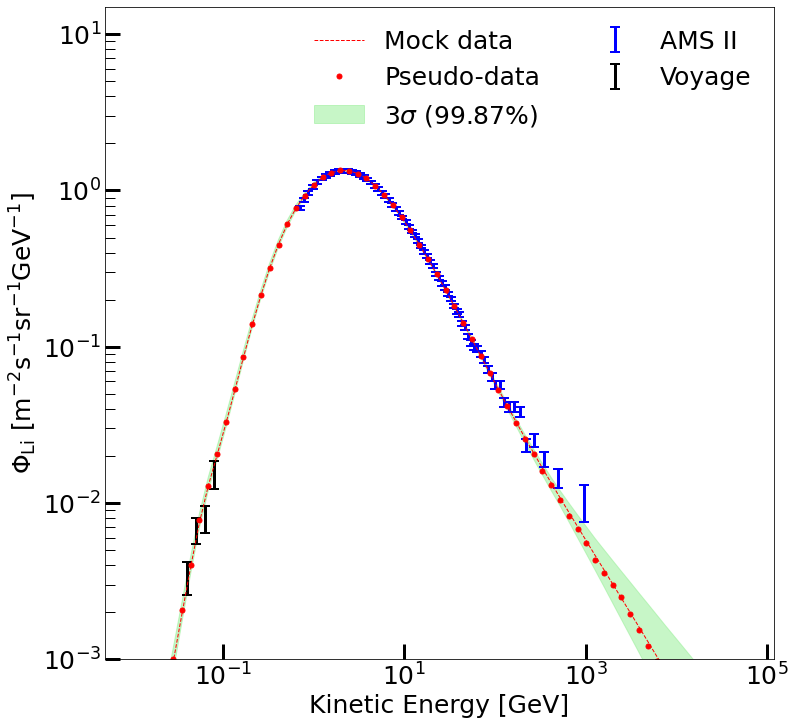

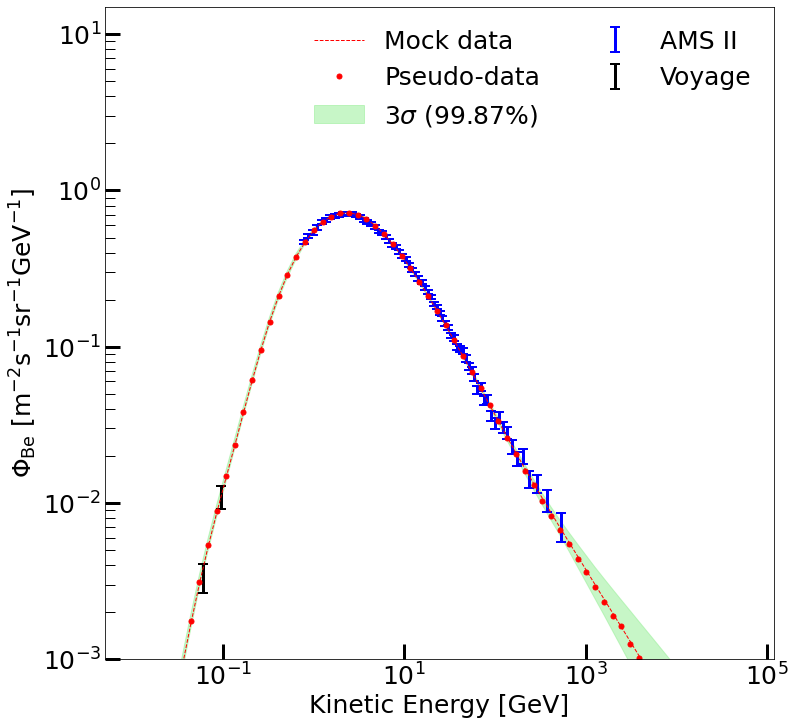

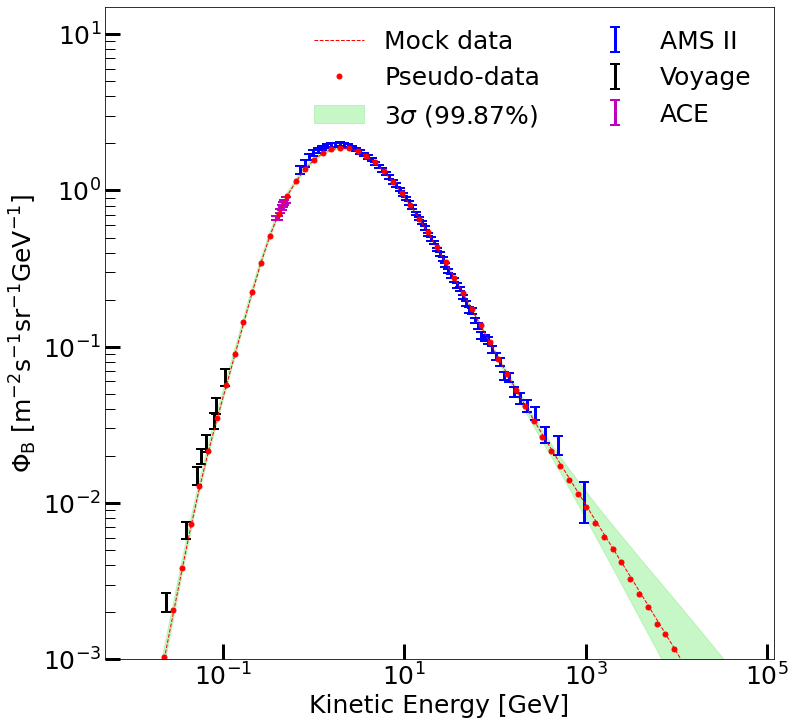

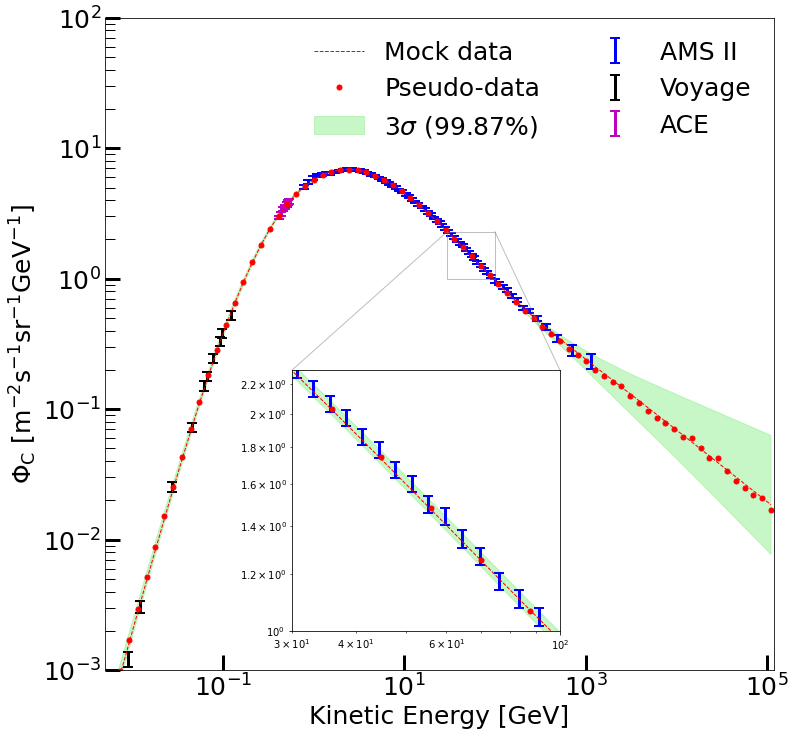

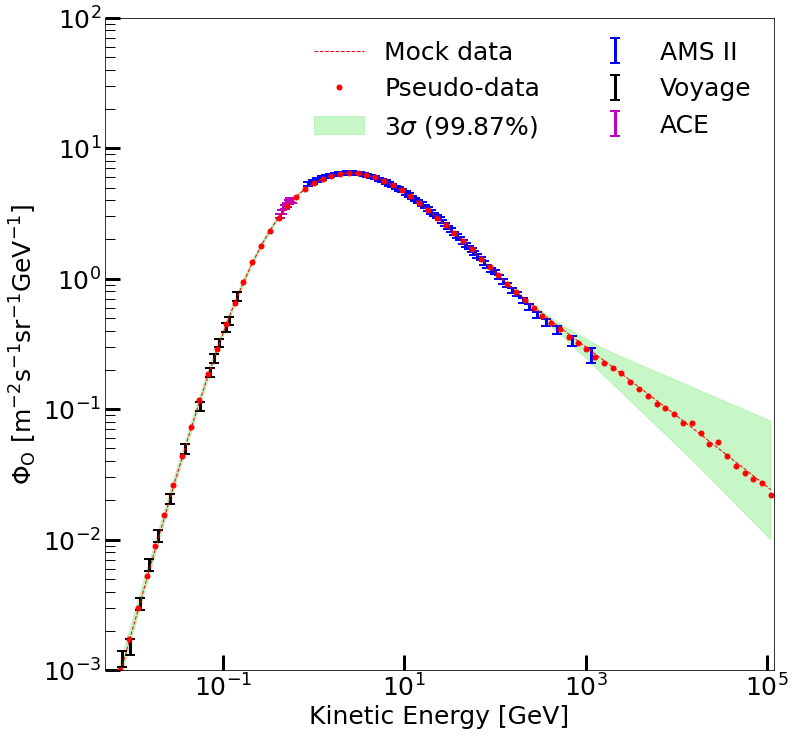

In [15]:
"""
Load Experimental Data
"""
####################################################################################
LiAMS, LiV = np.load("./Exp_Data/Li_AMS2.npy"),np.load("./Exp_Data/Li_Voyager.npy")
Li_Eams, Li_Fams, Li_Sams = LiAMS[0], LiAMS[1], LiAMS[2]
Li_Evy, Li_Fvy, Li_Svy = LiV[0], LiV[1], LiV[2]
Li_data = [[Li_Eams, Li_Fams, Li_Sams],[Li_Evy, Li_Fvy, Li_Svy]]
Li_name = ["AMS II", "Voyage"]
Li_color = ["b","k"]

BeAMS, BeV = np.load("./Exp_Data/Be_AMS2.npy"), np.load("./Exp_Data/Be_Voyager.npy")
Be_Eams, Be_Fams, Be_Sams = BeAMS[0], BeAMS[1], BeAMS[2]
Be_Evy, Be_Fvy, Be_Svy = BeV[0], BeV[1], BeV[2]
Be_data = [[Be_Eams, Be_Fams, Be_Sams],[Be_Evy, Be_Fvy, Be_Svy]]
Be_name = ["AMS II", "Voyage"]
Be_color = ["b","k"]

BAMS, BV, BA = np.load("./Exp_Data/B_AMS2.npy"), np.load("./Exp_Data/B_Voyager.npy"), np.load("./Exp_Data/B_ACE.npy")
B_Eams, B_Fams, B_Sams = BAMS[0], BAMS[1], BAMS[2]
B_Evy, B_Fvy, B_Svy = BV[0], BV[1], BV[2]
B_Eace,B_Face,B_Sace = BA[0], BA[1], BA[2]
B_data = [[B_Eams, B_Fams, B_Sams],[B_Evy, B_Fvy, B_Svy],[B_Eace,B_Face,B_Sace]]
B_name = ["AMS II", "Voyage", "ACE"]
B_color = ["b","k","m"]

CAMS, CV, CA = np.load("./Exp_Data/C_AMS2.npy"), np.load("./Exp_Data/C_Voyager.npy"), np.load("./Exp_Data/C_ACE.npy")
C_Eams, C_Fams, C_Sams = CAMS[0], CAMS[1], CAMS[2]
C_Evy, C_Fvy, C_Svy = CV[0], CV[1], CV[2]
C_Eace,C_Face,C_Sace = CA[0], CA[1], CA[2]
C_data = [[C_Eams, C_Fams, C_Sams],[C_Evy, C_Fvy, C_Svy],[C_Eace,C_Face,C_Sace]]
C_name = ["AMS II", "Voyage", "ACE"]
C_color = ["b","k","m"]

OAMS, OV, OA = np.load("./Exp_Data/O_AMS2.npy"), np.load("./Exp_Data/O_Voyager.npy"), np.load("./Exp_Data/O_ACE.npy")
O_Eams, O_Fams, O_Sams = OAMS[0], OAMS[1], OAMS[2]
O_Evy, O_Fvy, O_Svy = OV[0], OV[1], OV[2]
O_Eace,O_Face,O_Sace = OA[0], OA[1], OA[2]
O_data = [[O_Eams, O_Fams, O_Sams],[O_Evy, O_Fvy, O_Svy],[O_Eace,O_Face,O_Sace]]
O_name = ["AMS II", "Voyage", "ACE"]
O_color = ["b","k","m"]
####################################################################################


pseudolist = [pseudo.Li,pseudo.Be,pseudo.B,pseudo.C,pseudo.O]
return_4_list = [return_4.Li,return_4.Be,return_4.B,return_4.C,return_4.O]
return_all_list = [return_all.Li,return_all.Be,return_all.B,return_all.C,return_all.O]
pseudolist_name = ["$\Phi_\mathrm{Li}$","$\Phi_\mathrm{Be}$","$\Phi_\mathrm{B}$","$\Phi_\mathrm{C}$","$\Phi_\mathrm{O}$"]
save_name = ["Li","Be","B","C","O"]
exp_data = [Li_data,Be_data,B_data,C_data,O_data]
exp_name = [Li_name,Be_name,B_name,C_name,O_name]
exp_color = [Li_color,Be_color,B_color,C_color,O_color]
mock = np.zeros((2,84))
index = chi_index[0]
index_2 = chi_index[14999]
# index = chi_index_wo_noise[0]

for i, element in enumerate(pseudolist[:]):
#     i=3
    for j in range(84):
        mock[0,j] = min(data_3_sigma[:,j,i+1])
        mock[1,j] = max(data_3_sigma[:,j,i+1])


#     plt.figure(figsize=(12,12))
    fig, ax = plt.subplots(1,1, figsize=(12,12))
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*element[index] ,"s",color="red",linewidth = 3,label=pseudolist_name[i]) 
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*return_4_list[i][index] ,"-.",color="k",linewidth = 1, label="mock") 
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*return_all_list[i][chi_sort[0]] ,"d-.",color="k",linewidth = 3,label="mock") 
    
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*mock[0,:],"g--",linewidth = 3, label="$1 \sigma$")
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*mock[1,:],"g--",linewidth = 3)

#     plt.plot(pseudo.E[0], pseudo.E[0]**2*return_4_list[i][index_2] ,"--",color="cyan",linewidth = 1, label="mock data (BPA-2)") 
#     plt.plot(pseudo.E[0], pseudo.E[0]**2*element[index_2] ,"d",color="cyan",linewidth = 1,label="artificial fluctuation (BPA-2)") 
    

    """
    Experimental Data
    """
    for ind, element_ in enumerate(exp_data[i]):
        ax.errorbar(element_[0], element_[0]**2*element_[1], ls='', yerr=element_[0]**2*element_[2],elinewidth=3,capsize=5,capthick=2,
                     ecolor=exp_color[i][ind],label=exp_name[i][ind])
        
    
    p1 = ax.fill_between(pseudo.E[0], pseudo.E[0]**2*mock[0,:], pseudo.E[0]**2*mock[1,:], color = 'lightgreen', alpha =0.5, label="$3 \sigma$ (99.87%)")
    p2, = ax.plot(pseudo.E[0], pseudo.E[0]**2*return_4_list[i][index] ,"--",color="red",linewidth = 1, label="Mock data") 
    p3, = ax.plot(pseudo.E[0], pseudo.E[0]**2*element[index] ,"o",color="red",markersize=5,linewidth = 5,label="Pseudo-data")
    
    plt.tick_params(length=15, width=3, labelsize=25, direction="in")
    plt.tick_params(which='minor',width=1,length=10, labelsize=25, direction="in")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlim((5E-03,1.2E+05))
    plt.ylim((1E-03,15))
    plt.xlabel('Kinetic Energy [GeV]',fontsize=25,horizontalalignment='center',x=0.5)
    plt.ylabel(pseudolist_name[i]+" [$\mathrm{m}^{-2}\mathrm{s}^{-1}\mathrm{sr}^{-1}\mathrm{GeV}^{-1} $]",fontsize=25,horizontalalignment='center',y=0.5)
    
    
#     if i == 3:   
#         axins = ax.inset_axes([0.35, 0.06, 0.3, 0.3])
#     #     axins.plot(pseudo.E[0][52:62], pseudo.E[0][52:62]**2*element[index][52:62] ,"d",color="red",markersize=10,linewidth = 5)
#     #     axins.plot(pseudo.E[0][52:62], pseudo.E[0][52:62]**2*return_4_list[i][index][52:62] ,"-",color="red",linewidth = 1) 
#         for ind, element_ in enumerate(exp_data[i]):
#             axins.errorbar(element_[0], element_[0]**2*element_[1], ls='', yerr=element_[0]**2*element_[2],elinewidth=3,capsize=5,capthick=2,
#                          ecolor=exp_color[i][ind])
#         axins.plot(pseudo.E[0], pseudo.E[0]**2*element[index], "o", color="red", markersize=5, linewidth = 5)
#         axins.plot(pseudo.E[0], pseudo.E[0]**2*return_4_list[i][index], "--", color="red", linewidth = 1) 
        
#         axins.fill_between(pseudo.E[0], pseudo.E[0]**2*mock[0,:], pseudo.E[0]**2*mock[1,:], color = 'lightgreen', alpha =0.5)

#         # sub region of the original image
#         x1, x2, y1, y2 = 300, 3000, 1.5E-01, 4.5E-01
#         axins.set_xlim(x1, x2)
#         axins.set_ylim(y1, y2)
#         axins.set_xticklabels("")
#         axins.set_yticklabels("")
#         axins.set_xscale("log")
#     #     axins.set_yscale("log")
    
    
    
    
    if i == 3:   
        axins = ax.inset_axes([0.28, 0.06, 0.4, 0.4])
    #     axins.plot(pseudo.E[0][52:62], pseudo.E[0][52:62]**2*element[index][52:62] ,"d",color="red",markersize=10,linewidth = 5)
    #     axins.plot(pseudo.E[0][52:62], pseudo.E[0][52:62]**2*return_4_list[i][index][52:62] ,"-",color="red",linewidth = 1) 
        for ind, element_ in enumerate(exp_data[i]):
            axins.errorbar(element_[0], element_[0]**2*element_[1], ls='', yerr=element_[0]**2*element_[2],elinewidth=3,capsize=5,capthick=2,
                         ecolor=exp_color[i][ind])
        axins.plot(pseudo.E[0], pseudo.E[0]**2*element[index], "o", color="red", markersize=5, linewidth = 5)
        axins.plot(pseudo.E[0], pseudo.E[0]**2*return_4_list[i][index], "--", color="red", linewidth = 1) 
        
        axins.fill_between(pseudo.E[0], pseudo.E[0]**2*mock[0,:], pseudo.E[0]**2*mock[1,:], color = 'lightgreen', alpha =0.5)

        # sub region of the original image
        x1, x2, y1, y2 = 30, 100, 1E-0, 2.3E-0
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.set_xticklabels("")
        axins.set_yticklabels("")
        axins.set_xscale("log")
        axins.set_yscale("log")
    
    
    plt.legend(bbox_to_anchor=(1, 1), ncol=2, fontsize=25, edgecolor = "w", fancybox=False, framealpha=0)

    if i == 3: 
        ax.indicate_inset_zoom(axins)
        
    
    if i > 2:
        plt.ylim((1E-03,100))
    
    plt.savefig("./Figures/"+save_name[i]+".pdf")
    plt.show()

In [21]:
pseudo.total_data_in_ratio.shape


(15000, 84, 8)

In [ ]:
list = ["Li/C","Be/C","B/C","Li/O","Be/O","B/O","C/C_110","O/C"]
n = chi_index[3000]
plt.figure(figsize=(14,72))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(pseudo.E[0], pseudo.total_data_in_ratio[n,:,i] ,"--",label="Pseudo")
    plt.plot(return_4.E[0], return_4.total_data_in_ratio[n,:,i] ,"-",label="Return")

    plt.xscale("log")
    plt.xlabel('E (energy)', fontsize=20,horizontalalignment='right',x=1)
    plt.ylabel("Distribution ("+list[i] +") after Normalized",fontsize=15,horizontalalignment='right',y=1)
    plt.legend(ncol=2,fontsize=15)

In [137]:
len(input_pseudo) 

15000

In [16]:
model_wo_noise = load_model("./MODEL/CR_ML_without_noise_6sigma.h5")
model_w_noise = load_model("./MODEL/CR_ML_with_noise.h5")
# model = load_model("./Model_denoise_0/CR_ML_13.h5")
# prediction_pseudo = model.predict(input_pseudo)
prediction_return_wo_noise = model_wo_noise.predict(input_return[:15000][inpack_1][tmp_1])
prediction_return_w_noise = model_w_noise.predict(input_return[15000:][inpack_2][tmp_2])

In [17]:
importlib.reload(CR)
# pseudo_recovery = CR.Recovery(prediction_pseudo).para_recovery
return_recovery_wo_noise = CR.Recovery(prediction_return_wo_noise).para_recovery
return_recovery_w_noise = CR.Recovery(prediction_return_w_noise).para_recovery

prediction_return_wo_noise_all = model_wo_noise.predict(input_return[:15000])
prediction_return_w_noise_all = model_w_noise.predict(input_return[15000:])
return_recovery_wo_noise_all = CR.Recovery(prediction_return_wo_noise_all).para_recovery
return_recovery_w_noise_all = CR.Recovery(prediction_return_w_noise_all).para_recovery
# print(pseudo_recovery.shape)
print(return_recovery_wo_noise.shape)
print(return_recovery_w_noise.shape)

(8223, 10)
(8382, 10)


In [ ]:
"""Colors"""
#########################################################
Greens = cm.get_cmap('Greens_r', 256)
Blues = cm.get_cmap('Blues_r', 256)
Reds = cm.get_cmap('Reds_r', 256)
transparent = np.array([256/256, 256/256, 256/256, 0])
newGreen = Greens(np.linspace(1, 0, 256))
Green = np.array([0/256, 256/256, 128/256, 1])
newGreen[:1, :] = transparent
newGreen[255:, :] = Green
newGreen = ListedColormap(newGreen, name='GreenWhite')
newBlue = Blues(np.linspace(1, 0, 256))
# Blue = np.array([0/256, 0/256, 100/256, 1])
Blue = np.array([0.29803922, 0.70196078, 1. , 1])
newBlue[:1, :] = transparent
newBlue[255:, :] = Blue
newBlue = ListedColormap(newBlue, name='BlueWhite')
newRed = Reds(np.linspace(1, 0, 256))
Red = np.array([128/256, 0/256, 0/256, 1])
newRed[:1, :] = transparent
newRed[255:, :] = Red
newRed = ListedColormap(newRed, name='RedWhite')

#########################################################
D_min, D_max=[1.0, 15.0]
delta_min, delta_max=[0.20, 0.72]
zh_min, zh_max=[1.0, 20.0]
va_min, va_max=[1.0, 60.0]
eta_min, eta_max=[-4.0, 2.0]
Ap_min, Ap_max=[0 , 0]
nu1_min, nu1_max=[0.0, 3.0]
nu2_min, nu2_max=[2.0, 2.8]
R1_min, R1_max=[2.3, 4.3]
nu3_min, nu3_max=[1.8, 2.7]
R2_min, R2_max=[5.0, 6.0]
para_min = [D_min, delta_min, zh_min, va_min, eta_min, Ap_min, nu1_min, nu2_min, R1_min, nu3_min, R2_min]
para_max = [D_max, delta_max, zh_max, va_max, eta_max, Ap_max, nu1_max, nu2_max, R1_max, nu3_max, R2_max]
digit = [0,2,0,0,2,0,2,2,2,2,2]
paraname = ["$D_0$", "$\delta$", "$Z_h$", "$v_A$", "$\eta$", "Ap","$\\nu_1$", "$\\nu_2$", "$R_1$", "$\\nu_3$", "$R_2$"]
para_name  = [r"$D_0$ ($10^{28}$cm$^{2}$ s$^{-1})$", r"$\delta$", r"$Z_h$ $(kpc)$", r"$v_A$ (km s$^{-1}$)", 
              r"$\eta$", "Ap", r"$\nu_1$", r"$\nu_2$", r"$\log_{10}(R_{br,1})$", r"$\nu_3$", r"$\log_{10}(R_{br,2})$"]
save_name = ["D0", "delta", "Zh", "vA","eta", "Ap", "nu1", "nu2", "R1", "nu3", "R2"]

for i in range(11): #11
# for i in range(0,1):
    if i == 5:
        continue
    for j in range(i+1, 11): #11
#     for j in range(i+1,3):
        if j == 5:
            continue
        fig, ax = plt.subplots(1,1, figsize=(10,10))

        deltax = max(para_6_sigma[:,i])-min(para_6_sigma[:,i])
        deltay = max(para_6_sigma[:,j])-min(para_6_sigma[:,j])
        
        bins_x = np.linspace(min(para_6_sigma[:,i])-deltax/10,max(para_6_sigma[:,i])+deltax/10, 81)
        bins_y = np.linspace(min(para_6_sigma[:,j])-deltay/10,max(para_6_sigma[:,j])+deltay/10, 81)
        
        
        sigma_6, xedges_6, yedges_6 = np.histogram2d(para_6_sigma[:,i], para_6_sigma[:,j] , bins=(bins_x,bins_y))
#         sigma_4, xedges, yedges = np.histogram2d(para_4_sigma[:,i], para_4_sigma[:,j] , bins=(bins_x,bins_y))
        sigma_3, xedges, yedges = np.histogram2d(para_3_sigma[:,i], para_3_sigma[:,j] , bins=(bins_x,bins_y))
        sigma_1, xedges, yedges = np.histogram2d(para_1_sigma[:,i], para_1_sigma[:,j] , bins=(bins_x,bins_y))
        
        
        sigma = [sigma_6,sigma_3,sigma_1]
#         sigma = [sigma_6,sigma_4,sigma_1]
        color = [newRed,newBlue,newGreen]
        sum_sigma, N_sigma, e_sigma, flaten, count = [], [], [], [], []
        cutoff = []
#         for t in range(3):
#             sum_sigma.append(np.sum(sigma[t][sigma[t]!=0]))
#             N_sigma.append(np.sum(np.exp(sigma[t][sigma[t]!=0]/sum_sigma[t])))
#             e_sigma.append(np.exp(sigma[t][sigma[t]!=0]/sum_sigma[t])/N_sigma[t])
#             flaten.append(np.ndarray.flatten(e_sigma[t]))
#             for pro in range(len(flaten[t])):
#                 if np.sum(flaten[t][np.argsort(flaten[t])][:pro+1]) >= 0.05:
#                     cutoff.append(pro+1)
#                     break
                
#             count.append(np.count_nonzero(flaten[t] == flaten[t][np.argsort(flaten[t])][cutoff[t]]))
            
#             plt.imshow(np.exp(sigma[t].T/sum_sigma[t])/N_sigma[t], 
#                        vmin=flaten[t][np.argsort(flaten[t])][cutoff[t]], 
#                        vmax=flaten[t][np.argsort(flaten[t])][count[t]+1], 
#                        origin="lower" ,cmap=color[t], alpha = 1)
        
        plt.imshow(sigma_6.T, vmin=0, vmax=1, origin="lower" ,cmap=newBlue, alpha = 1)
        plt.imshow(sigma_3.T, vmin=0, vmax=1, origin="lower" ,cmap=newGreen, alpha = 1)
#         plt.imshow(sigma_4.T, vmin=0, vmax=1, origin="lower" ,cmap=newBlue, alpha = 1)
#         plt.imshow(sigma_1.T, vmin=0, vmax=1, origin="lower" ,cmap=newRed, alpha = 1)

#         plt.hlines(0.9, 0.8, 0.8, color=(128/256,0,0),label="1 $\sigma$", linewidth = 5)
        plt.hlines(0.9, 0.8, 0.8, color=(0,1,0.5,1),label="3 $\sigma$ ($99.87\%$)", linewidth = 5)
#         plt.hlines(0.9, 0.8, 0.8, color="lightgreen",label="3 $\sigma$", linewidth = 5)
        plt.hlines(0.9, 0.8, 0.8, color=(0.29803922, 0.70196078, 1.),label="6 $\sigma$ ($\\approx 100\%$)", linewidth = 5)

#         index = chi_index[-1]#-15000
#         index_wo_noise = chi_index_wo_noise[:100]
#         index_w_noise = chi_index_w_noise[:100]
        thin_data = np.linspace(0,8200,42,dtype="int")
        index_wo_noise = chi_index_wo_noise[thin_data]
        index_w_noise = chi_index_w_noise[thin_data]
        
        k,f = i,j
        if i >= 5 :
            k = i - 1
        if j >= 5 :
            f = j - 1
#         plt.scatter((pseudo_recovery[index,k] - xedges[0])/abs((xedges[1]-xedges[0])), 
#                     (pseudo_recovery[index,f] - yedges[0])/abs((yedges[1]-yedges[0])),
#                     s=30, 
# #                     c=(1,0.8,0.3), 
#                     c = "m",
#                     label="pseudo-data")
        plt.scatter((return_recovery_wo_noise[index_wo_noise[1:],k] - xedges[0])/(xedges[1]-xedges[0]), 
                    (return_recovery_wo_noise[index_wo_noise[1:],f] - yedges[0])/(yedges[1]-yedges[0]),
                     marker= "$\mathrm{O}$" ,s=150, c="r", label="Machine A")
        plt.scatter((return_recovery_w_noise[index_w_noise[1:],k] - xedges[0])/(xedges[1]-xedges[0]), 
                (return_recovery_w_noise[index_w_noise[1:],f] - yedges[0])/(yedges[1]-yedges[0]),
                 marker= "$\mathrm{X}$" ,s=150, c="k", label="Machine B")

#         plt.scatter((return_recovery_wo_noise[index_wo_noise[0],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                     (return_recovery_wo_noise[index_wo_noise[0],f] - yedges[0])/(yedges[1]-yedges[0]),
#                      marker= "^" ,s=250, c="magenta", label="BPA-1")
        
#         plt.scatter((return_recovery_wo_noise[index_wo_noise[-1],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                     (return_recovery_wo_noise[index_wo_noise[-1],f] - yedges[0])/(yedges[1]-yedges[0]),
#                      marker= "v" ,s=250, c="magenta", label="BPA-2")
        
#         plt.scatter((return_recovery_wo_noise_all[np.argsort(chi_4[:15000])[14999],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                     (return_recovery_wo_noise_all[np.argsort(chi_4[:15000])[14999],f] - yedges[0])/(yedges[1]-yedges[0]),
#                      marker= "v" ,s=250, c="magenta", label="BPA-2")
        
        
#         plt.scatter((return_recovery_w_noise_all[index_w_noise[0],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                 (return_recovery_w_noise_all[index_w_noise[0],f] - yedges[0])/(yedges[1]-yedges[0]),
#                  marker= "<" ,s=250, c="lightgray", label="BPB-1")
        
#         plt.scatter((return_recovery_w_noise_all[index_w_noise[-1],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                 (return_recovery_w_noise_all[index_w_noise[-1],f] - yedges[0])/(yedges[1]-yedges[0]),
#                  marker= ">" ,s=250, c="lightgray", label="BPB-2")
        
#         plt.scatter((return_recovery_w_noise_all[np.argsort(chi_4[15000:])[14999],k] - xedges[0])/(xedges[1]-xedges[0]), 
#                 (return_recovery_w_noise_all[np.argsort(chi_4[15000:])[14999],f] - yedges[0])/(yedges[1]-yedges[0]),
#                  marker= ">" ,s=250, c="blue", label="BPB-2")
        
        
#         plt.scatter((mock_4.new_parameter[index+0,i] - xedges[0])/(xedges[1]-xedges[0]), 
#                     (mock_4.new_parameter[index+0,j] - yedges[0])/(yedges[1]-yedges[0]),
#                     s=10, c="k", label="truth parameter")
        
        
#         plt.title(paraname[i]+" v.s. "+paraname[j], fontsize=25)

#         ax.text(5, 75, "Machine A",fontsize=30)
        
        ax.set_xticks([0,20,40,60,80])
        ax.set_xticklabels([str(round(bins_x[0],digit[i])),str(round(bins_x[20],digit[i])),str(round(bins_x[40],digit[i])),
                            str(round(bins_x[60],digit[i])),str(round(bins_x[80],digit[i]))], 
                       fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
        ax.tick_params(axis='x', length=10, width=3, labelsize=25, direction="in") 
        ax.set_xlabel(para_name[i], fontsize=30, horizontalalignment='center',x=0.5)
        
        ax.set_yticks([0,20,40,60,80])
        ax.set_yticklabels([str(round(bins_y[0],digit[j])),str(round(bins_y[20],digit[j])),str(round(bins_y[40],digit[j])),
                            str(round(bins_y[60],digit[j])),str(round(bins_y[80],digit[j]))], 
                       fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
        ax.tick_params(axis='y', length=10, width=3, labelsize=25, direction="in")
        ax.set_ylabel(para_name[j], fontsize=30, horizontalalignment='center',y=0.5)
        

        if save_name[i] == "D0" and save_name[j] == "Zh":
#             plt.legend(ncol=2,fontsize=25, edgecolor = "w", fancybox=False, framealpha=0)
            plt.legend(bbox_to_anchor=(0.5, 0.95),ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
#             plt.legend((20,70),ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
#             plt.legend(loc="upper left",ncol=1,fontsize=25,frameon=False)

        if save_name[i] == "nu1" and save_name[j] == "R1":
            plt.legend(bbox_to_anchor=(0.5, 0.95),ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)

    
#         plt.savefig("./Figures/phase_space_w_noise_prior100/"+save_name[i]+"_"+save_name[j]+".pdf")
        plt.savefig("./Figures/phase_space_thin_data_100/"+save_name[i]+"_"+save_name[j]+".pdf")
        plt.show()

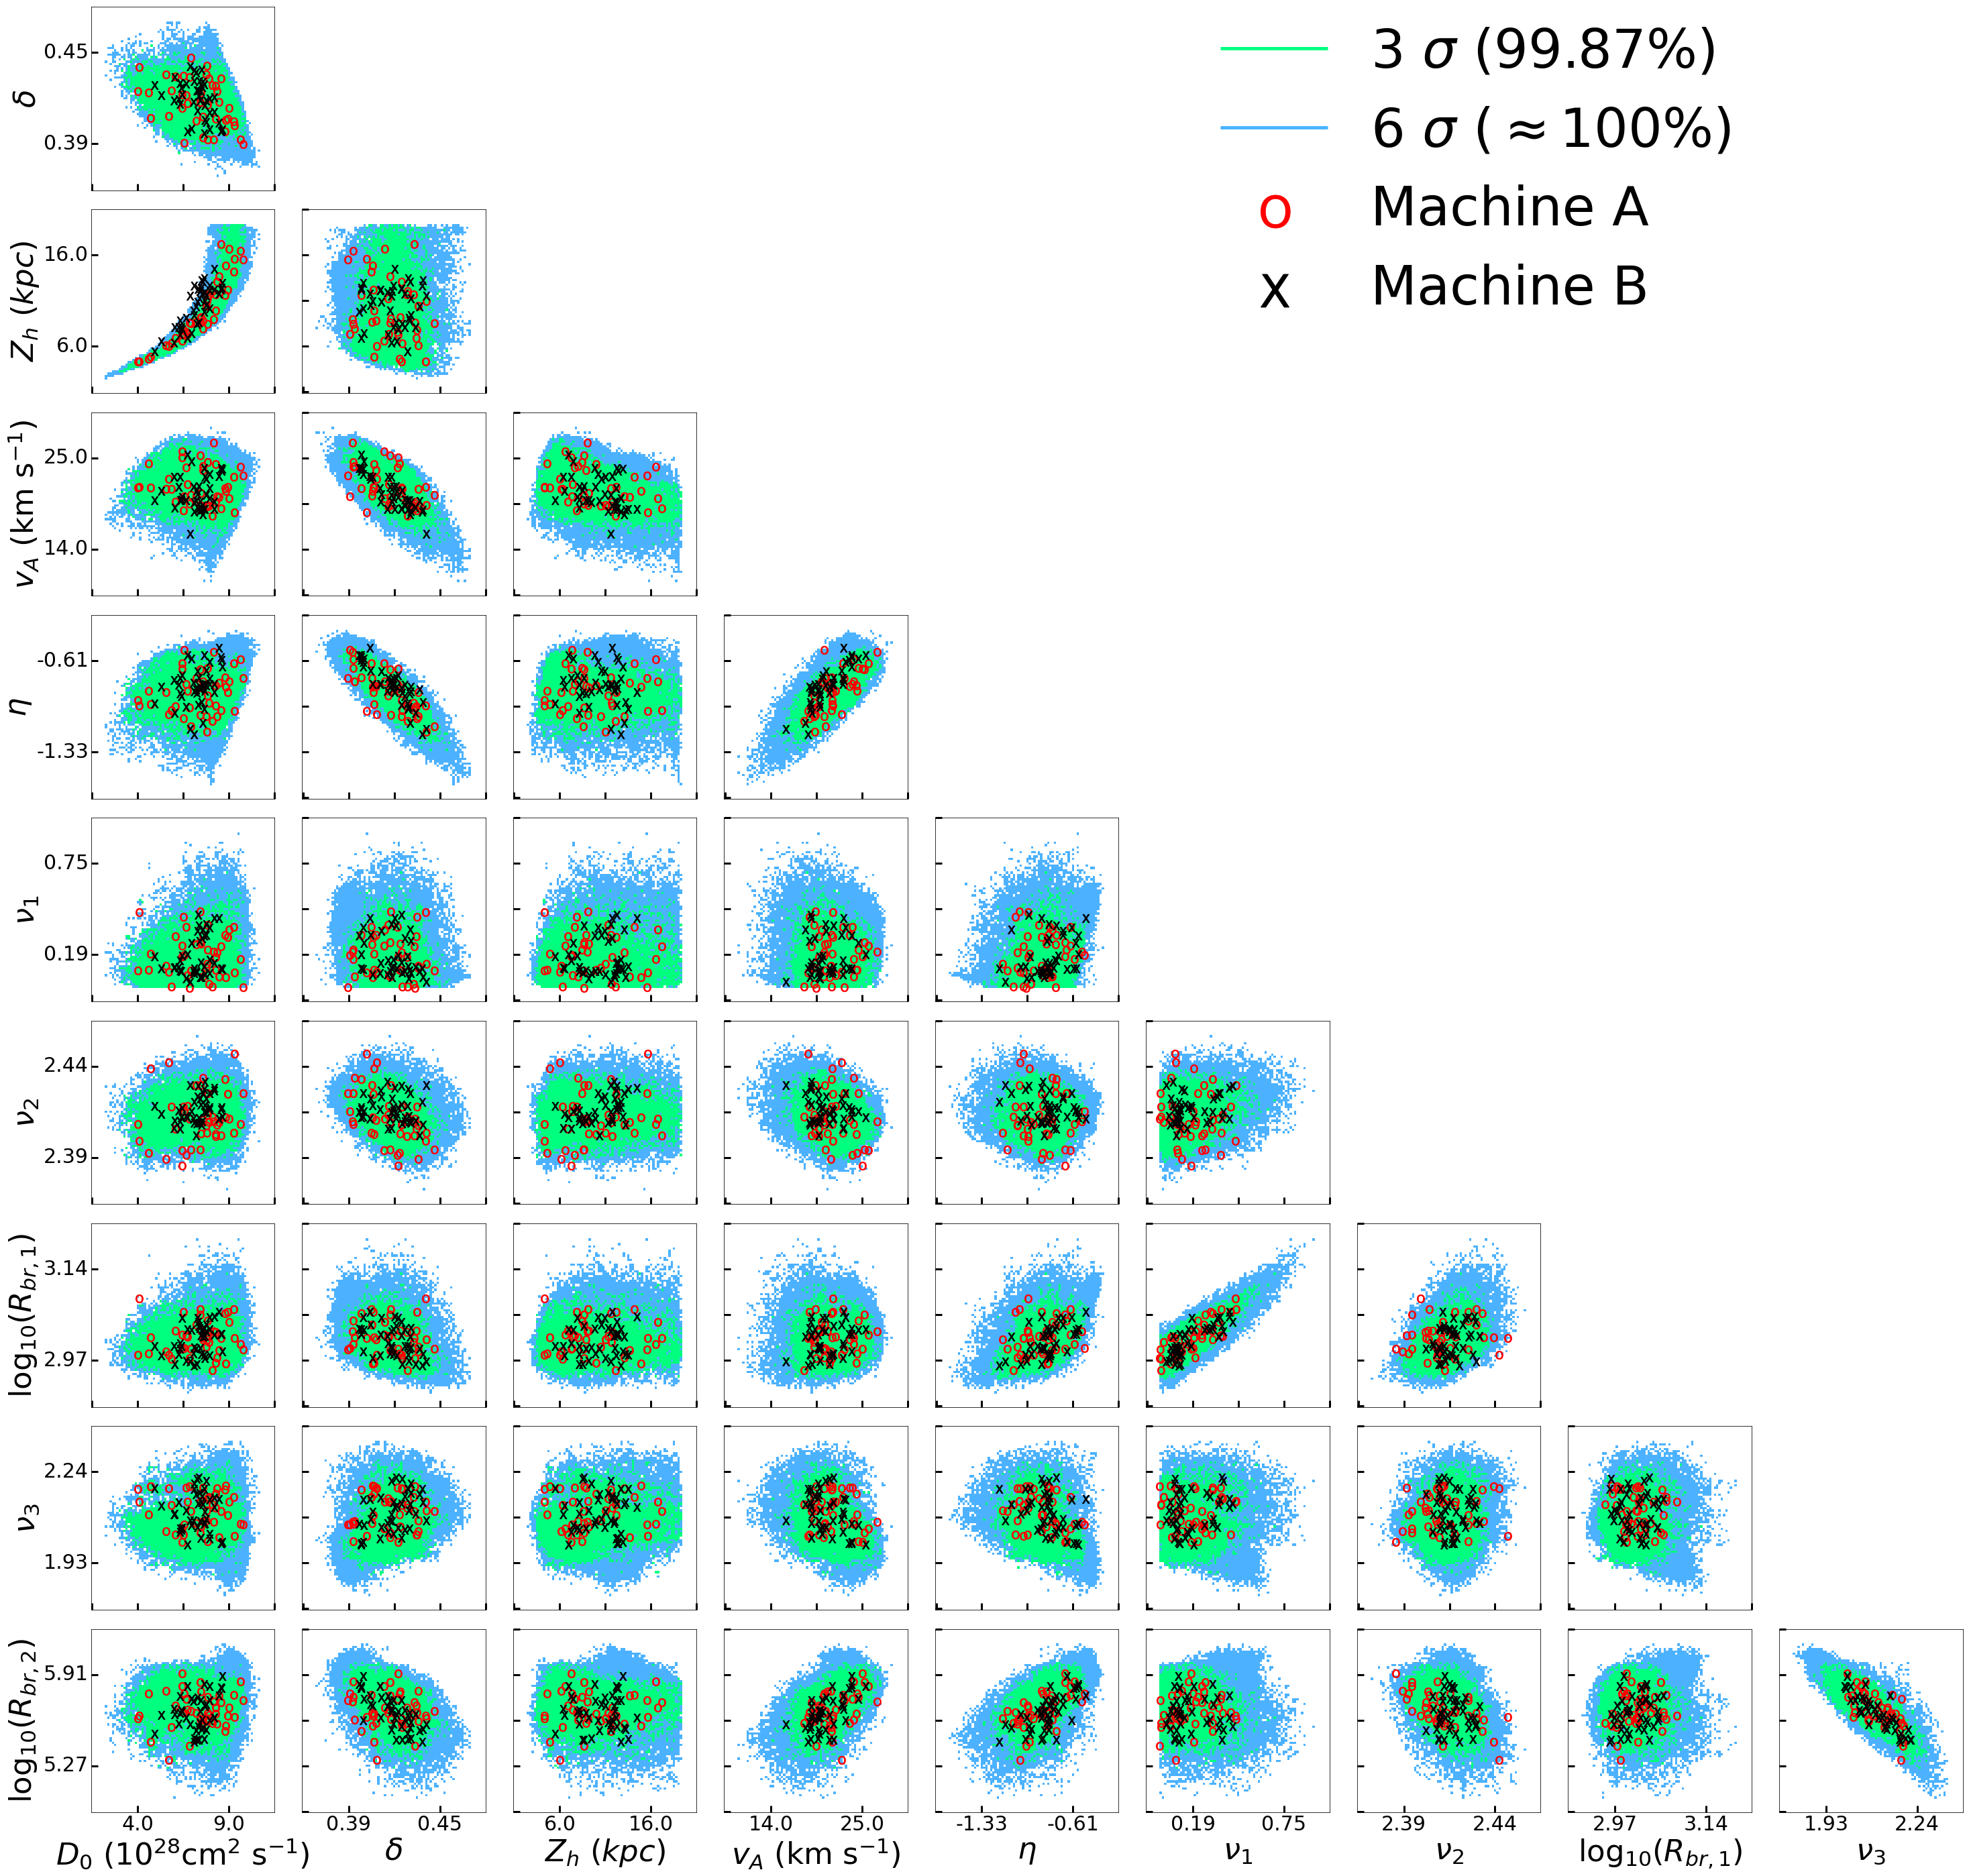

In [58]:
"""Colors"""
#########################################################
Greens = cm.get_cmap('Greens_r', 256)
Blues = cm.get_cmap('Blues_r', 256)
Reds = cm.get_cmap('Reds_r', 256)
transparent = np.array([256/256, 256/256, 256/256, 0])
newGreen = Greens(np.linspace(1, 0, 256))
Green = np.array([0/256, 256/256, 128/256, 1])
newGreen[:1, :] = transparent
newGreen[255:, :] = Green
newGreen = ListedColormap(newGreen, name='GreenWhite')
newBlue = Blues(np.linspace(1, 0, 256))
# Blue = np.array([0/256, 0/256, 100/256, 1])
Blue = np.array([0.29803922, 0.70196078, 1. , 1])
newBlue[:1, :] = transparent
newBlue[255:, :] = Blue
newBlue = ListedColormap(newBlue, name='BlueWhite')
newRed = Reds(np.linspace(1, 0, 256))
Red = np.array([128/256, 0/256, 0/256, 1])
newRed[:1, :] = transparent
newRed[255:, :] = Red
newRed = ListedColormap(newRed, name='RedWhite')

#########################################################
D_min, D_max=[1.0, 15.0]
delta_min, delta_max=[0.20, 0.72]
zh_min, zh_max=[1.0, 20.0]
va_min, va_max=[1.0, 60.0]
eta_min, eta_max=[-4.0, 2.0]
Ap_min, Ap_max=[0 , 0]
nu1_min, nu1_max=[0.0, 3.0]
nu2_min, nu2_max=[2.0, 2.8]
R1_min, R1_max=[2.3, 4.3]
nu3_min, nu3_max=[1.8, 2.7]
R2_min, R2_max=[5.0, 6.0]
para_min = [D_min, delta_min, zh_min, va_min, eta_min, Ap_min, nu1_min, nu2_min, R1_min, nu3_min, R2_min]
para_max = [D_max, delta_max, zh_max, va_max, eta_max, Ap_max, nu1_max, nu2_max, R1_max, nu3_max, R2_max]
digit = [0,2,0,0,2,0,2,2,2,2,2]
paraname = ["$D_0$", "$\delta$", "$Z_h$", "$v_A$", "$\eta$", "Ap","$\\nu_1$", "$\\nu_2$", "$R_1$", "$\\nu_3$", "$R_2$"]
para_name  = [r"$D_0$ ($10^{28}$cm$^{2}$ s$^{-1})$", r"$\delta$", r"$Z_h$ $(kpc)$", r"$v_A$ (km s$^{-1}$)", 
              r"$\eta$", "Ap", r"$\nu_1$", r"$\nu_2$", r"$\log_{10}(R_{br,1})$", r"$\nu_3$", r"$\log_{10}(R_{br,2})$"]
save_name = ["D0", "delta", "Zh", "vA","eta", "Ap", "nu1", "nu2", "R1", "nu3", "R2"]
# save_name = ["1", "2", "3", "4","5", "6", "7", "8", "9", "10", "11"]

# fig, ax = plt.subplots(4,4, figsize=(10,10))

fig, ax = plt.subplots(1,1, figsize=(50,50))

for i in range(11):
# for i in range(0,3):
    if i == 5:
        continue
    for j in range(i+1, 11):
#     for j in range(i+1,3):
        if j == 5:
            continue

        k,f = i,j
        if i >= 5 :
            k = i - 1
        if j >= 5 :
            f = j - 1

        plot_axis = plt.subplot(9,9,(f-1)*9+k+1)
        
#         print(k,f)
#         print(9-(k*3+f)+1)
        
        deltax = max(para_6_sigma[:,i])-min(para_6_sigma[:,i])
        deltay = max(para_6_sigma[:,j])-min(para_6_sigma[:,j])
        
        bins_x = np.linspace(min(para_6_sigma[:,i])-deltax/10,max(para_6_sigma[:,i])+deltax/10, 81)
        bins_y = np.linspace(min(para_6_sigma[:,j])-deltay/10,max(para_6_sigma[:,j])+deltay/10, 81)
        
        
        sigma_6, xedges_6, yedges_6 = np.histogram2d(para_6_sigma[:,i], para_6_sigma[:,j] , bins=(bins_x,bins_y))
        sigma_3, xedges, yedges = np.histogram2d(para_3_sigma[:,i], para_3_sigma[:,j] , bins=(bins_x,bins_y))
        sigma_1, xedges, yedges = np.histogram2d(para_1_sigma[:,i], para_1_sigma[:,j] , bins=(bins_x,bins_y))
        
        
        sigma = [sigma_6,sigma_3,sigma_1]
#         sigma = [sigma_6,sigma_4,sigma_1]
        color = [newRed,newBlue,newGreen]
        sum_sigma, N_sigma, e_sigma, flaten, count = [], [], [], [], []
        cutoff = []
               
    
        plot_axis.imshow(sigma_6.T, vmin=0, vmax=1, origin="lower" ,cmap=newBlue, alpha = 1)
        plot_axis.imshow(sigma_3.T, vmin=0, vmax=1, origin="lower" ,cmap=newGreen, alpha = 1)
        plot_axis.hlines(0.9, 0.8, 0.8, color=(0,1,0.5,1),label="3 $\sigma$ ($99.87\%$)", linewidth = 5)
        plot_axis.hlines(0.9, 0.8, 0.8, color=(0.29803922, 0.70196078, 1.),label="6 $\sigma$ ($\\approx 100\%$)", linewidth = 5)

#         index = chi_index[-1]#-15000
#         index_wo_noise = chi_index_wo_noise[:100]
#         index_w_noise = chi_index_w_noise[:100]
        thin_data = np.linspace(0,8200,42,dtype="int")
        index_wo_noise = chi_index_wo_noise[thin_data]
        index_w_noise = chi_index_w_noise[thin_data]

        plot_axis.scatter((return_recovery_wo_noise[index_wo_noise,k] - xedges[0])/(xedges[1]-xedges[0]), 
                    (return_recovery_wo_noise[index_wo_noise,f] - yedges[0])/(yedges[1]-yedges[0]),
                     marker= "$\mathrm{O}$" ,s=150, c="r", label="Machine A")
        plot_axis.scatter((return_recovery_w_noise[index_w_noise,k] - xedges[0])/(xedges[1]-xedges[0]), 
                (return_recovery_w_noise[index_w_noise,f] - yedges[0])/(yedges[1]-yedges[0]),
                 marker= "$\mathrm{X}$" ,s=150, c="k", label="Machine B")

        
        plot_axis.set_xticks([0,20,40,60,80])
        plot_axis.set_xticklabels(["","","","",""], fontsize=25, rotation=0)
        plot_axis.tick_params(axis='x', length=10, width=3, labelsize=25, direction="in")

        
        plot_axis.set_yticks([0,20,40,60,80])
        plot_axis.set_yticklabels(["","","","",""], fontsize=25, rotation=0)
        plot_axis.tick_params(axis='y', length=10, width=3, labelsize=25, direction="in")

        if (f-1)*9+k+1 > 72:
            plot_axis.set_xlabel(para_name[i], fontsize=45, horizontalalignment='center',x=0.5)
            plot_axis.set_xticks([20,60])
            plot_axis.set_xticklabels([str(round(bins_x[20],digit[i])),
                                str(round(bins_x[60],digit[i]))], 
                           fontsize=30, rotation=0, verticalalignment='top', horizontalalignment="center") 

            
            
        if ((f-1)*9+k+1)%9 == 1:
            plot_axis.set_ylabel(para_name[j], fontsize=45, horizontalalignment='center',y=0.5)
            plot_axis.set_yticks([20,60])
            plot_axis.set_yticklabels([str(round(bins_y[20],digit[j])),
                        str(round(bins_y[60],digit[j]))], 
                       fontsize=30, rotation=0, verticalalignment='center', horizontalalignment="right")
        
        
# plt.scatter( 50, 100, marker= "$\mathrm{X}$" ,s=1000, c="k", label="Machine B")
plt.subplots_adjust(wspace=0.15, hspace=0.01)
plt.legend(bbox_to_anchor=(0, 10), ncol=1,fontsize=80, markerscale=4, edgecolor = "w",fancybox=False, framealpha=0)
# plt.savefig("./Figures/phase_space_thin_data_100/total.pdf",bbox_inches='tight', pad_inches=0)
plt.savefig("./Figures/total.pdf",bbox_inches='tight', pad_inches=0)
plt.show()